#Task 1:
This dataset includes scores from three test scores of students at a (fictional) public school and a variety of personal and socio-economic factors that may have interaction effects upon them.
Column description:
1.  `Gender`: Gender of the student (male/female)
2.  `EthnicGroup`: Ethnic group of the student (group A to E)
3.  `ParentEduc`: Parent(s) education background (from some_highschool to master's degree)
4.  `LunchType`: School lunch type (standard or free/reduced)
5.  `TestPrep`: Test preparation course followed (completed or none)
6.  `ParentMaritalStatus`: Parent(s) marital status (married/single/widowed/divorced)
7.  `PracticeSport`: How often the student parctice sport (never/sometimes/regularly))
8.  `IsFirstChild`: If the child is first child in the family or not (yes/no)
9.  `NrSiblings`: Number of siblings the student has (0 to 7)
10. `TransportMeans`: Means of transport to school (schoolbus/private)
11. `WklyStudyHours`: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
12. `MathScore`: math test score(0-100)
13. `ReadingScore`: reading test score(0-100)
13. `WritingScore`: writing test score(0-100)

#Download the dataset
Run the cell below

In [ ]:
!gdown 1La5PlbYWPH1VyiE8Zq2BDAYWqtpd56Z2

Downloading...
From: https://drive.google.com/uc?id=1La5PlbYWPH1VyiE8Zq2BDAYWqtpd56Z2
To: /content/Expanded_data_with_more_features.csv
100% 2.91M/2.91M [00:00<00:00, 145MB/s]


#Read the dataset

In [ ]:
import pandas as pd
data = pd.read_csv('/content/Expanded_data_with_more_features.csv')

#Visualization

<Axes: ylabel='Frequency'>

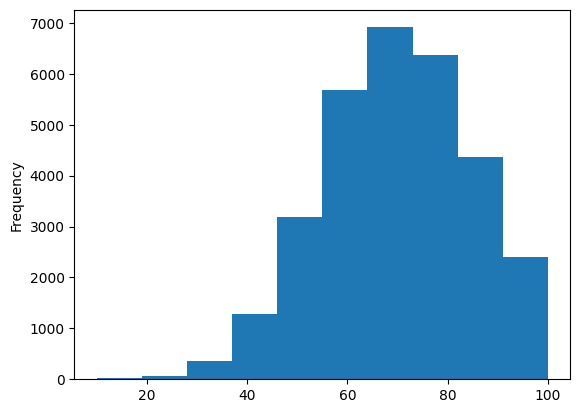

In [ ]:
data['ReadingScore'].plot.hist()

#Missing Values & Textual data

In [ ]:
data.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [ ]:
data=data.drop(columns=['Unnamed: 0'],axis=1)
data

Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      female         NaN   bachelor's degree      standard       none   
1      female     group C        some college      standard        NaN   
2      female     group B     master's degree      standard       none   
3        male     group A  associate's degree  free/reduced       none   
4        male     group C        some college      standard       none   
...       ...         ...                 ...           ...        ...   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30638  female         NaN         high school  free/reduced  completed   
30639  female     group D  associate's degree      standard  completed   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0                 married     regularly          yes         3.0   
1                 married     sometimes          yes         0.0   
2                  single     sometimes          yes         4.0   
3                 married         never           no         1.0   
4                 married     sometimes          yes         0.0   
...                   ...           ...          ...         ...   
30636              single     sometimes           no         2.0   
30637              single     regularly           no         1.0   
30638             married     sometimes           no         1.0   
30639             married     regularly           no         3.0   
30640             married         never           no         1.0   

      TransportMeans WklyStudyHours  MathScore  ReadingScore  WritingScore  
0         school_bus            < 5         71            71            74  
1                NaN         5 - 10         69            90            88  
2         school_bus            < 5         87            93            91  
3                NaN         5 - 10         45            56            42  
4         school_bus         5 - 10         76            78            75  
...              ...            ...        ...           ...           ...  
30636     school_bus         5 - 10         59            61            65  
30637        private         5 - 10         58            53            51  
30638        private         5 - 10         61            70            67  
30639     school_bus         5 - 10         82            90            93  
30640     school_bus         5 - 10         64            60            58  

[30641 rows x 14 columns]

In [ ]:
data["TestPrep"].value_counts()

none         18856
completed     9955
Name: TestPrep, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [ ]:
data["WklyStudyHours"].value_counts()

5 - 10    16246
< 5        8238
> 10       5202
Name: WklyStudyHours, dtype: int64

In [ ]:
 def encode_education(x):
  if type(x) == float: #np.nan e float znaci za null ke se vrati null toa sakame
    return x
  if "college" in x:
    return 1
  if "high school" in x:
    return 0
  if "associate" in x:
    return 2
  if "bachelor" in x:
    return 3
  if "master" in x:
    return 4

In [ ]:
data["ParentEduc"]=data["ParentEduc"].apply(encode_education)

In [ ]:
 def encode_testprep(x):
  if type(x) == float: #np.nan e float znaci za null ke se vrati null toa sakame
    return x
  if "none" in x:
    return 0
  if "completed" in x:
    return 1

In [ ]:
data["TestPrep"]=data["TestPrep"].apply(encode_testprep)

In [ ]:
 def encode_marital(x):
  if type(x) == float: #np.nan e float znaci za null ke se vrati null toa sakame
    return x
  if "married" in x:
    return 3
  if "single" in x:
    return 0
  if "divorced" in x:
    return 1
  if "widowed" in x:
    return 2

In [ ]:
data["ParentMaritalStatus"]=data["ParentMaritalStatus"].apply(encode_marital)

In [ ]:
 def encode_sport(x):
  if type(x) == float: #np.nan e float znaci za null ke se vrati null toa sakame
    return x
  if "never" in x:
    return 0
  if "sometimes" in x:
    return 1
  if "regularly" in x:
    return 2

In [ ]:
data["PracticeSport"]=data["PracticeSport"].apply(encode_sport)

In [ ]:
 def encode_isFirst(x):
  if type(x) == float: #np.nan e float znaci za null ke se vrati null toa sakame
    return x
  if "no" in x:
    return 0
  if "yes" in x:
    return 1

In [ ]:
data["IsFirstChild"]=data["IsFirstChild"].apply(encode_isFirst)

In [ ]:
 def encode_transport(x):
  if type(x) == float: #np.nan e float znaci za null ke se vrati null toa sakame
    return x
  if "school_bus" in x:
    return 0
  if "private" in x:
    return 1

In [ ]:
data["TransportMeans"]=data["TransportMeans"].apply(encode_transport)

In [ ]:
def encode_hours(x):
  if type(x) == float:
    return x
  if x == '< 5':
    return 0
  if x == "5 - 10":
    return 1
  return 2

In [ ]:
data["WklyStudyHours"]=data["WklyStudyHours"].apply(encode_hours)

In [ ]:
data = data.dropna(subset='EthnicGroup', axis=0)

In [ ]:
data.isnull().sum()

Gender                    0
EthnicGroup               0
ParentEduc             1731
LunchType                 0
TestPrep               1706
ParentMaritalStatus    1107
PracticeSport           583
IsFirstChild            852
NrSiblings             1470
TransportMeans         2947
WklyStudyHours          886
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import seaborn as sns
import matplotlib.pyplot as pl

In [ ]:
imputer = IterativeImputer()

In [ ]:
columns_to_impute=["ParentEduc","TestPrep","ParentMaritalStatus","PracticeSport","IsFirstChild","NrSiblings","TransportMeans","WklyStudyHours"]

In [ ]:
data[columns_to_impute]=imputer.fit_transform(data[columns_to_impute])

<ipython-input-150-8e6ecb57aff0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_impute]=imputer.fit_transform(data[columns_to_impute])


In [ ]:
data.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [ ]:
data

Gender EthnicGroup  ParentEduc     LunchType  TestPrep  \
1      female     group C         1.0      standard  0.347544   
2      female     group B         4.0      standard  0.000000   
3        male     group A         2.0  free/reduced  0.000000   
4        male     group C         1.0      standard  0.000000   
5      female     group B         2.0      standard  0.000000   
...       ...         ...         ...           ...       ...   
30635    male     group C         1.0      standard  0.000000   
30636  female     group D         0.0      standard  0.000000   
30637    male     group E         0.0      standard  0.000000   
30639  female     group D         2.0      standard  1.000000   
30640    male     group B         1.0      standard  0.000000   

       ParentMaritalStatus  PracticeSport  IsFirstChild  NrSiblings  \
1                      3.0            1.0           1.0         0.0   
2                      0.0            1.0           1.0         4.0   
3                      3.0            0.0           0.0         1.0   
4                      3.0            1.0           1.0         0.0   
5                      3.0            2.0           1.0         1.0   
...                    ...            ...           ...         ...   
30635                  3.0            2.0           0.0         2.0   
30636                  0.0            1.0           0.0         2.0   
30637                  0.0            2.0           0.0         1.0   
30639                  3.0            2.0           0.0         3.0   
30640                  3.0            0.0           0.0         1.0   

       TransportMeans  WklyStudyHours  MathScore  ReadingScore  WritingScore  
1            0.408369             1.0         69            90            88  
2            0.000000             0.0         87            93            91  
3            0.410271             1.0         45            56            42  
4            0.000000             1.0         76            78            75  
5            0.000000             1.0         73            84            79  
...               ...             ...        ...           ...           ...  
30635        0.000000             1.0         58            53            49  
30636        0.000000             1.0         59            61            65  
30637        1.000000             1.0         58            53            51  
30639        0.000000             1.0         82            90            93  
30640        0.000000             1.0         64            60            58  

[28801 rows x 14 columns]

In [ ]:
 from sklearn.preprocessing import LabelEncoder
 le=LabelEncoder()
 data["Gender"]=le.fit_transform(data["Gender"])
 data["EthnicGroup"]=le.fit_transform(data["EthnicGroup"])
 data["LunchType"]=le.fit_transform(data["LunchType"])

In [ ]:
data

Gender  EthnicGroup  ParentEduc  LunchType  TestPrep  \
1           0            2         1.0          1  0.347544   
2           0            1         4.0          1  0.000000   
3           1            0         2.0          0  0.000000   
4           1            2         1.0          1  0.000000   
5           0            1         2.0          1  0.000000   
...       ...          ...         ...        ...       ...   
30635       1            2         1.0          1  0.000000   
30636       0            3         0.0          1  0.000000   
30637       1            4         0.0          1  0.000000   
30639       0            3         2.0          1  1.000000   
30640       1            1         1.0          1  0.000000   

       ParentMaritalStatus  PracticeSport  IsFirstChild  NrSiblings  \
1                      3.0            1.0           1.0         0.0   
2                      0.0            1.0           1.0         4.0   
3                      3.0            0.0           0.0         1.0   
4                      3.0            1.0           1.0         0.0   
5                      3.0            2.0           1.0         1.0   
...                    ...            ...           ...         ...   
30635                  3.0            2.0           0.0         2.0   
30636                  0.0            1.0           0.0         2.0   
30637                  0.0            2.0           0.0         1.0   
30639                  3.0            2.0           0.0         3.0   
30640                  3.0            0.0           0.0         1.0   

       TransportMeans  WklyStudyHours  MathScore  ReadingScore  WritingScore  
1            0.408369             1.0         69            90            88  
2            0.000000             0.0         87            93            91  
3            0.410271             1.0         45            56            42  
4            0.000000             1.0         76            78            75  
5            0.000000             1.0         73            84            79  
...               ...             ...        ...           ...           ...  
30635        0.000000             1.0         58            53            49  
30636        0.000000             1.0         59            61            65  
30637        1.000000             1.0         58            53            51  
30639        0.000000             1.0         82            90            93  
30640        0.000000             1.0         64            60            58  

[28801 rows x 14 columns]

In [ ]:
#Dali ima znacitelna razlika vo mathScore ako roditelite imaat sredno ili faks
print(data[data['ParentEduc'] == 4]['MathScore'].describe())
print("----")
print(data[data['ParentEduc'] == 1]['MathScore'].describe())

count    1906.000000
mean       72.292235
std        14.646530
min        22.000000
25%        62.000000
50%        73.000000
75%        83.000000
max       100.000000
Name: MathScore, dtype: float64
----
count    6216.000000
mean       66.414093
std        15.296239
min         9.000000
25%        56.000000
50%        66.000000
75%        77.000000
max       100.000000
Name: MathScore, dtype: float64


<Axes: ylabel='Frequency'>

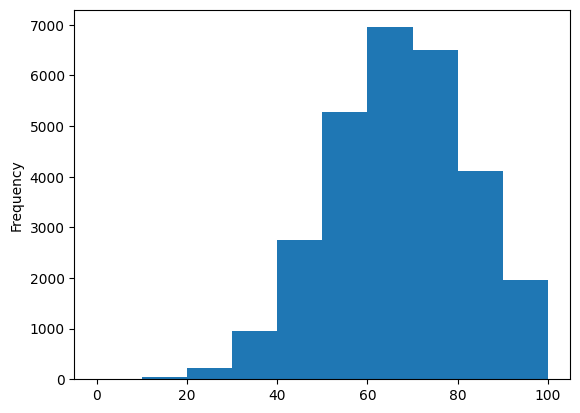

In [ ]:
#kakva distribucija ima mathScore
data['MathScore'].plot.hist()

#Train - test split of the dataset (80:20 ratio)

In [ ]:
from sklearn.model_selection import train_test_split
X, Y = data.drop(columns=['EthnicGroup']), data['EthnicGroup']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#Model training (Use KNN, Logistic regression or Linear regression)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = KNeighborsClassifier(n_neighbors=23)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=23)

In [ ]:
preds = model.predict(X_test)

#Model evaluation

In [ ]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.18      0.01      0.02       430
           1       0.19      0.16      0.18      1100
           2       0.32      0.55      0.41      1867
           3       0.27      0.26      0.27      1533
           4       0.15      0.03      0.04       831

    accuracy                           0.28      5761
   macro avg       0.22      0.20      0.18      5761
weighted avg       0.25      0.28      0.24      5761

